# Project: Predicting Credit Card Approvals 



## Content


**1. Introduction** 

**2. Dataset** 

**3. Objective** 

**4. Sourcing and Loading** 
- Import packages
- Load the data
- Explore the data
 
**5. Inspecting the applications**

**6. Handling the missing values (part 1)**

**7. Handling the missing values (part 2)**

**8. Handling the missing values (part 3)**

**9. Change some features data values and correct data types**

**10. Visualization**

**11. Preprocessing the data (part 1)**

**12. Splitting the dataset into train and test sets**

**13. Preprocessing the data (part 2)**

**14. Modeling**
- Logistic Regression model.
- Decision Tree - Entrop - No Max depth.
- Decision Tree - Gini - max_depth=5.
- Random Forest.
- Gradient Boosting.
- Extreme Gradient Boosting.


**15. Model Comparison and the Winner !!!**

## 1. Introduction

Commercial banks receive a lot of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this notebook, we will build an automatic credit card approval predictor using machine learning techniques, just like the real banks do.

![ccard](https://user-images.githubusercontent.com/67468718/106730102-10cf9600-65c3-11eb-91d4-bc15e9b37ed9.jpeg)


## 2. Dataset

We'll be using the Credit Card Approval dataset from the UCI Machine Learning Repository [location](http://archive.ics.uci.edu/ml/datasets/credit+approval).

This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data.

Furthermore, this dataset is interesting because there is a good mix of attributes: continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

## 3. Objective

The structure of this notebook is as follows:

 * First, we will start off by loading and viewing the dataset.
 * We will see that the dataset has a mixture of both numerical and categorical features, that it contains values from different ranges, plus that it contains a number of missing entries.
We will have to preprocess the dataset to ensure the machine learning model we choose can make good predictions.
 * After our data is in good shape, we will do some exploratory data analysis to build our intuitions.
 * Finally, we will build a machine learning model that can predict if an individual's application for a credit card will be accepted.

## 4. Sourcing and Loading

First, loading and viewing the dataset. We find that since this data is confidential, the contributor of the dataset has anonymized the feature names.

### 4.1 Import Packages

In [5]:
# Import pandas
import pandas as pd

# Import numpy
import numpy as np

#Import matplotlib and seaborn:
import matplotlib.pyplot as plt
import seaborn as sns

# Import train_test_split
from sklearn.model_selection import train_test_split

# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV




### 4.2 Load the Data

In [6]:
cols = ['gender', 'age', 'debt', 'married', 'bankcustomer', 
        'education_level', 'Ethnicity', 'years_employed', 
        'prior_default', 'employed', 'CreditScore', 'drivers_license',
       'citizen', 'zipcode', 'income', 'approved']

# Load dataset
df = pd.read_csv("datasets/cc_approvals.data", header=None, names=cols)

# Inspect data
df.head()

,gender,age,debt,married,bankcustomer,education_level,Ethnicity,years_employed,prior_default,employed,CreditScore,drivers_license,citizen,zipcode,income,approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [7]:
df.shape

(690, 16)

## 5. Inspecting the applications

<p>The output may appear a bit confusing at its first sight, but let's try to figure out the most important features of a credit card application. The features of this dataset have been anonymized to protect the privacy, but <a href="http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html">this blog</a> gives us a pretty good overview of the probable features. The probable features in a typical credit card application are <code>Gender</code>, <code>Age</code>, <code>Debt</code>, <code>Married</code>, <code>BankCustomer</code>, <code>EducationLevel</code>, <code>Ethnicity</code>, <code>YearsEmployed</code>, <code>PriorDefault</code>, <code>Employed</code>, <code>CreditScore</code>, <code>DriversLicense</code>, <code>Citizen</code>, <code>ZipCode</code>, <code>Income</code> and finally the <code>ApprovalStatus</code>. This gives us a pretty good starting point, and we can map these features with respect to the columns in the output.   </p>
<p>As we can see from our first glance at the data, the dataset has a mixture of numerical and categorical features. This can be fixed with some preprocessing, but before we do that, let's learn about the dataset a bit more to see if there are other dataset issues that need to be fixed.</p>

In [8]:
# Print DataFrame information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           690 non-null    object 
 1   age              690 non-null    object 
 2   debt             690 non-null    float64
 3   married          690 non-null    object 
 4   bankcustomer     690 non-null    object 
 5   education_level  690 non-null    object 
 6   Ethnicity        690 non-null    object 
 7   years_employed   690 non-null    float64
 8   prior_default    690 non-null    object 
 9   employed         690 non-null    object 
 10  CreditScore      690 non-null    int64  
 11  drivers_license  690 non-null    object 
 12  citizen          690 non-null    object 
 13  zipcode          690 non-null    object 
 14  income           690 non-null    int64  
 15  approved         690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [9]:
# Print DataFrame shape:
df.shape

(690, 16)

In [10]:
#Let's check the summary statistic for our Numerical Features:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
debt,690.0,4.758725,4.978163,0.0,1.000,2.75,7.2075,28.0
years_employed,690.0,2.223406,3.346513,0.0,0.165,1.00,2.6250,28.5
CreditScore,690.0,2.400000,4.862940,0.0,0.000,0.00,3.0000,67.0
income,690.0,1017.385507,5210.102598,0.0,0.000,5.00,395.5000,100000.0


In [11]:
# let's explore missing, no of unique values and the data types:
df_unique_missing = pd.concat([df.nunique(), df.dtypes, df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
df_unique_missing.columns = ['Distinct_Count', 'Data_type', 'NANs_Count', 'NANs%']
df_unique_missing

,Distinct_Count,Data_type,NANs_Count,NANs%
gender,3,object,0,0.0
age,350,object,0,0.0
debt,215,float64,0,0.0
married,4,object,0,0.0
bankcustomer,4,object,0,0.0
education_level,15,object,0,0.0
Ethnicity,10,object,0,0.0
years_employed,132,float64,0,0.0
prior_default,2,object,0,0.0
employed,2,object,0,0.0


In [12]:
df.columns.unique()

Index(['gender', 'age', 'debt', 'married', 'bankcustomer', 'education_level',
       'Ethnicity', 'years_employed', 'prior_default', 'employed',
       'CreditScore', 'drivers_license', 'citizen', 'zipcode', 'income',
       'approved'],
      dtype='object')

In [13]:
df.columns.nunique()

16

In [14]:
df.approved.unique()

array(['+', '-'], dtype=object)

In [15]:
# Let's define numerical features based on datatype:
numeric_feat = df.columns[(df.dtypes == 'int64') | (df.dtypes == 'float64')].tolist()
numeric_feat

['debt', 'years_employed', 'CreditScore', 'income']

In [16]:
# Let's define categorical features based on datatype:
Categorical_feat = df.columns[(df.dtypes == 'object') | (df.dtypes == 'category')].tolist()
Categorical_feat

['gender',
 'age',
 'married',
 'bankcustomer',
 'education_level',
 'Ethnicity',
 'prior_default',
 'employed',
 'drivers_license',
 'citizen',
 'zipcode',
 'approved']

## 6. Handling the missing values (part 1)

  <p>We've uncovered some issues that will affect the performance of our machine learning model(s) if they go unchanged:</p>
<ul>
<li>Our dataset contains both numerical and categorical data (specifically data that are of <code>float64</code>, <code>int64</code> and <code>object</code> types). Specifically, the features:'dept', 'years_employed', 'CreditScore' and 'income' contain numeric values (of types float64, float64, int64 and int64 respectively) and all the other features contain categorical features values.</li>
<li>The dataset also contains values from several ranges. Some features have a value range of 0 - 28, some have a range of 2 - 67, and some have a range of 1017 - 100000. Apart from these, we can get useful statistical information (like <code>mean</code>, <code>max</code>, and <code>min</code>) about the features that have numerical values. </li>
<li>Two features defined as an object and those need to be converted to float64: 'age' & 'zipcode'.    
<li>Finally, the dataset has missing values, which we'll take care of next. The missing values in the dataset are labeled with '?', which can be seen in the most categorical features.</li>
</ul>
<p>Now, let's temporarily replace these missing value question marks with NaN.</p>
  

In [17]:
# Inspect missing values in the dataset
print(df.gender.unique())

['b' 'a' '?']


In [18]:
# So now let's Replace the '?'s with NaN in our df:
df = df.replace('?', np.nan)
print("\n")

# Inspect missing values in the dataset
df_unique_missing = pd.concat([df.nunique(), df.dtypes, df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
df_unique_missing.columns = ['Distinct_Count', 'Data_type', 'NANs_Count', 'NANs%']
df_unique_missing

,Distinct_Count,Data_type,NANs_Count,NANs%
gender,2,object,12,1.739130
age,349,object,12,1.739130
debt,215,float64,0,0.000000
married,3,object,6,0.869565
bankcustomer,3,object,6,0.869565
education_level,14,object,9,1.304348
Ethnicity,9,object,9,1.304348
years_employed,132,float64,0,0.000000
prior_default,2,object,0,0.000000
employed,2,object,0,0.000000


## 7. Handling the missing values (part 2)


We replaced all the question marks with NaNs. This is going to help us in the next missing value treatment that we are going to perform.

An important question that gets raised here is why are we giving so much importance to missing values? Can't they be just ignored? Ignoring missing values can affect the performance of a machine learning model heavily. While ignoring the missing values our machine learning model may miss out on information about the dataset that may be useful for its training. Then, there are many models which cannot handle missing values implicitly such as LDA.

So, to avoid this problem, we are going to impute the missing values with a strategy called mean imputation.

In [19]:
# First, let's impute the missing values with mean imputation in the numeric-feat:
df.fillna(df.mean(), inplace=True)

# Count the number of NaNs in the dataset to verify
df_unique_missing = pd.concat([df.nunique(), df.dtypes, df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
df_unique_missing.columns = ['Distinct_Count', 'Data_type', 'NANs_Count', 'NANs%']
df_unique_missing

,Distinct_Count,Data_type,NANs_Count,NANs%
gender,2,object,12,1.739130
age,349,object,12,1.739130
debt,215,float64,0,0.000000
married,3,object,6,0.869565
bankcustomer,3,object,6,0.869565
education_level,14,object,9,1.304348
Ethnicity,9,object,9,1.304348
years_employed,132,float64,0,0.000000
prior_default,2,object,0,0.000000
employed,2,object,0,0.000000


## 8. Handling the missing values (part iii)

We have successfully taken care of the missing values present in the numeric columns. There are still some missing values to be imputed for columns 0, 1, 3, 4, 5, 6 and 13. All of these columns contain categorical data and this why the mean imputation strategy would not work here. This needs a different treatment.

We are going to impute these missing values with the most frequent values as present in the respective columns. This is good practice when it comes to imputing missing values for categorical data in general.

In [20]:
# so let's iterate over each column of our dataframe:
for col in df:
    # Check if the column is of 'object' type:
    if df[col].dtypes == 'object':
        # Impute with the most frequent value
        df = df.fillna(df[col].value_counts().index[0])

In [21]:
#Let's count the number of NaNs in the dataset and print the counts to verify:
# Count the number of NaNs in the dataset to verify
df_unique_missing = pd.concat([df.nunique(), df.dtypes, df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
df_unique_missing.columns = ['Distinct_Count', 'Data_type', 'NANs_Count', 'NANs%']
df_unique_missing


,Distinct_Count,Data_type,NANs_Count,NANs%
gender,2,object,0,0.0
age,350,object,0,0.0
debt,215,float64,0,0.0
married,4,object,0,0.0
bankcustomer,4,object,0,0.0
education_level,15,object,0,0.0
Ethnicity,10,object,0,0.0
years_employed,132,float64,0,0.0
prior_default,2,object,0,0.0
employed,2,object,0,0.0


## 9. Change some features data values and correct data types


In [22]:
# first let's 'approved' distribution:
df['approved'].value_counts()

-    383
+    307
Name: approved, dtype: int64

In [23]:
# let's change 'approved' data contents from +/- to 1/0
df['approved'] = df['approved'].replace('-', 0)
df['approved'] = df['approved'].replace('+', 1)
df['approved'].value_counts()

0    383
1    307
Name: approved, dtype: int64

In [24]:
# before we change datatype of 'age' and 'zipcode':
# let's inspect the data to see id the values are numeric: 
df[df['age'].str.isalnum() == True]

,gender,age,debt,married,bankcustomer,education_level,Ethnicity,years_employed,prior_default,employed,CreditScore,drivers_license,citizen,zipcode,income,approved
83,a,b,3.500,u,g,d,v,3.000,t,f,0,t,g,00300,0,0
86,b,b,0.375,u,g,d,v,0.875,t,f,0,t,s,00928,0,0
92,b,b,5.000,y,p,aa,v,8.500,t,f,0,f,g,00000,0,0
97,b,b,0.500,u,g,c,bb,0.835,t,f,0,t,s,00320,0,0
254,b,b,0.625,u,g,k,v,0.250,f,f,0,f,g,00380,2010,0
286,a,b,1.500,u,g,ff,ff,0.000,f,t,2,t,g,00200,105,0
329,b,b,4.000,y,p,i,v,0.085,f,f,0,t,g,00411,0,0
445,a,b,11.250,u,g,ff,ff,0.000,f,f,0,f,g,b,5200,0
450,b,b,3.000,y,p,i,bb,7.000,f,f,0,f,g,00000,1,0
500,b,b,4.000,u,g,x,v,5.000,t,t,3,t,g,00290,2279,1


In [25]:
# let's inspect the data to see if the values are numeric: 
df[df['zipcode'].str.isalpha() == True]

,gender,age,debt,married,bankcustomer,education_level,Ethnicity,years_employed,prior_default,employed,CreditScore,drivers_license,citizen,zipcode,income,approved
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,b,0,0
202,b,24.83,2.750,u,g,c,v,2.250,t,t,6,f,g,b,600,1
206,a,71.58,0.000,b,b,b,b,0.000,f,f,0,f,p,b,0,1
243,a,18.75,7.500,u,g,q,v,2.710,t,t,5,f,g,b,26726,1
270,b,37.58,0.000,b,b,b,b,0.000,f,f,0,f,p,b,0,1
278,b,24.58,13.500,y,p,ff,ff,0.000,f,f,0,f,g,b,0,0
330,b,20.42,0.000,b,b,b,b,0.000,f,f,0,f,p,b,0,0
406,a,40.33,8.125,y,p,k,v,0.165,f,t,2,f,g,b,18,0
445,a,b,11.250,u,g,ff,ff,0.000,f,f,0,f,g,b,5200,0
456,b,34.58,0.000,b,b,b,b,0.000,f,f,0,f,p,b,0,0


In [26]:
# inspect 'b in 'zipcode'
df[df['zipcode'] == 'b']

,gender,age,debt,married,bankcustomer,education_level,Ethnicity,years_employed,prior_default,employed,CreditScore,drivers_license,citizen,zipcode,income,approved
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,b,0,0
202,b,24.83,2.750,u,g,c,v,2.250,t,t,6,f,g,b,600,1
206,a,71.58,0.000,b,b,b,b,0.000,f,f,0,f,p,b,0,1
243,a,18.75,7.500,u,g,q,v,2.710,t,t,5,f,g,b,26726,1
270,b,37.58,0.000,b,b,b,b,0.000,f,f,0,f,p,b,0,1
278,b,24.58,13.500,y,p,ff,ff,0.000,f,f,0,f,g,b,0,0
330,b,20.42,0.000,b,b,b,b,0.000,f,f,0,f,p,b,0,0
406,a,40.33,8.125,y,p,k,v,0.165,f,t,2,f,g,b,18,0
445,a,b,11.250,u,g,ff,ff,0.000,f,f,0,f,g,b,5200,0
456,b,34.58,0.000,b,b,b,b,0.000,f,f,0,f,p,b,0,0


In [27]:
# inspect 'b in 'age'
df[df['age'] == 'b']

,gender,age,debt,married,bankcustomer,education_level,Ethnicity,years_employed,prior_default,employed,CreditScore,drivers_license,citizen,zipcode,income,approved
83,a,b,3.500,u,g,d,v,3.000,t,f,0,t,g,00300,0,0
86,b,b,0.375,u,g,d,v,0.875,t,f,0,t,s,00928,0,0
92,b,b,5.000,y,p,aa,v,8.500,t,f,0,f,g,00000,0,0
97,b,b,0.500,u,g,c,bb,0.835,t,f,0,t,s,00320,0,0
254,b,b,0.625,u,g,k,v,0.250,f,f,0,f,g,00380,2010,0
286,a,b,1.500,u,g,ff,ff,0.000,f,t,2,t,g,00200,105,0
329,b,b,4.000,y,p,i,v,0.085,f,f,0,t,g,00411,0,0
445,a,b,11.250,u,g,ff,ff,0.000,f,f,0,f,g,b,5200,0
450,b,b,3.000,y,p,i,bb,7.000,f,f,0,f,g,00000,1,0
500,b,b,4.000,u,g,x,v,5.000,t,t,3,t,g,00290,2279,1


In [28]:
pd.options.display.max_rows = None
df['zipcode'].value_counts()

00000    132
00120     35
00200     35
00160     34
00080     30
00100     30
00280     22
00180     18
00140     16
00320     14
00240     14
00300     13
b         13
00260     11
00220      9
00400      9
00060      9
00360      7
00340      7
00380      5
00440      4
00232      4
00144      4
00070      4
00520      4
00108      4
00040      4
00420      4
00132      4
00216      3
00181      3
00128      3
00480      3
00164      3
00290      3
00096      3
00176      3
00150      3
00272      3
00460      3
00252      2
00088      2
00350      2
00092      2
00330      2
00073      2
00370      2
00130      2
00168      2
00020      2
00129      2
00312      2
00136      2
00560      2
00110      2
00050      2
00396      2
00112      2
00210      2
00500      2
00145      2
00228      2
00154      2
00720      2
00225      2
00352      2
00399      2
00980      1
00043      1
00840      1
00288      1
00239      1
00470      1
00395      1
00021      1
00167      1
00519      1

In [29]:
pd.options.display.max_rows = None
df['age'].value_counts()

b        12
22.67     9
20.42     7
19.17     6
25.00     6
23.58     6
22.50     6
18.83     6
24.50     6
20.67     6
27.83     5
27.67     5
23.00     5
33.17     5
23.08     5
23.25     5
22.08     4
23.50     4
34.17     4
26.17     4
22.92     4
28.58     4
32.33     4
20.00     4
25.67     4
20.75     4
25.17     4
27.25     4
26.67     4
24.75     4
29.50     4
41.17     4
24.58     4
35.17     4
48.17     3
21.50     3
34.83     3
22.17     3
22.58     3
18.58     3
21.08     3
19.67     3
32.25     3
28.25     3
23.75     3
18.17     3
34.08     3
20.08     3
17.92     3
39.92     3
23.42     3
20.50     3
25.25     3
22.75     3
37.50     3
26.75     3
28.17     3
34.00     3
31.25     3
40.58     3
18.08     3
24.08     3
36.67     3
36.75     3
23.17     3
36.17     3
33.67     3
21.92     3
20.17     3
16.33     3
21.83     3
33.58     3
19.42     3
22.25     3
17.08     3
25.75     3
21.17     3
37.33     3
39.17     3
27.58     3
40.92     3
29.83     3
20.83     3
19.5

In [30]:
# Let's change 'b in both 'age', and 'zipcode' as below:
df['zipcode'] = df['zipcode'].replace('b', '00120')  # let's impute 'b' with most 2nd frequent value at 'zipcode'
df['age'] = df['age'].replace('b', '22.67') # let's impute 'b' with most frequent value at 'age'

In [31]:
#let's confirm if we still have 'b' in both 'age' & 'zipcode':
df[df['zipcode'] == 'b']

,gender,age,debt,married,bankcustomer,education_level,Ethnicity,years_employed,prior_default,employed,CreditScore,drivers_license,citizen,zipcode,income,approved


In [32]:
# and age ...
df[df['age'] == 'b']

,gender,age,debt,married,bankcustomer,education_level,Ethnicity,years_employed,prior_default,employed,CreditScore,drivers_license,citizen,zipcode,income,approved


In [33]:
# let's change data types at both 'age' & 'zipcode':
df['age'] = df['age'].astype('float64')
df['zipcode'] = df['zipcode'].astype('int64')

In [34]:
#Now let's confirm that we don't NANs and all our datatypes are correct:
df_unique_missing = pd.concat([df.nunique(), df.dtypes, df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
df_unique_missing.columns = ['Distinct_Count', 'Data_type', 'NANs_Count', 'NANs%']
df_unique_missing

,Distinct_Count,Data_type,NANs_Count,NANs%
gender,2,object,0,0.0
age,349,float64,0,0.0
debt,215,float64,0,0.0
married,4,object,0,0.0
bankcustomer,4,object,0,0.0
education_level,15,object,0,0.0
Ethnicity,10,object,0,0.0
years_employed,132,float64,0,0.0
prior_default,2,object,0,0.0
employed,2,object,0,0.0


In [35]:
# let's print Categorical_feat and numeric_feat:

Categorical_feat = df.columns[df.dtypes == 'object']
print("Categorical_feat:")
print(Categorical_feat)

print('\n')

numeric_feat = df.columns[(df.dtypes == 'float64') | (df.dtypes == 'int64') ]
print("numeric_feat:")
print(numeric_feat)

Categorical_feat:
Index(['gender', 'married', 'bankcustomer', 'education_level', 'Ethnicity',
       'prior_default', 'employed', 'drivers_license', 'citizen'],
      dtype='object')


numeric_feat:
Index(['age', 'debt', 'years_employed', 'CreditScore', 'zipcode', 'income',
       'approved'],
      dtype='object')


## 10. Visualization

<Figure size 1152x576 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Credit Card Approval Correlation')

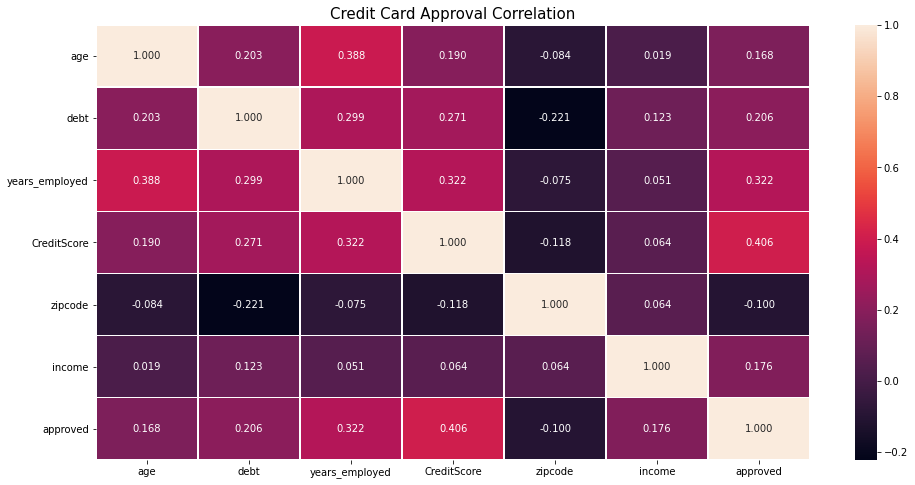

In [36]:
# Make a heatmap of the data 
plt.figure(figsize=(16,8)) # ensure that the Matplotlib plot is big enough
sns.heatmap(df.corr(), linewidths=.4, annot=True, fmt=".3f")
plt.title('Credit Card Approval Correlation', fontsize=15)

Text(0.5, 1.0, 'Age Distribution')

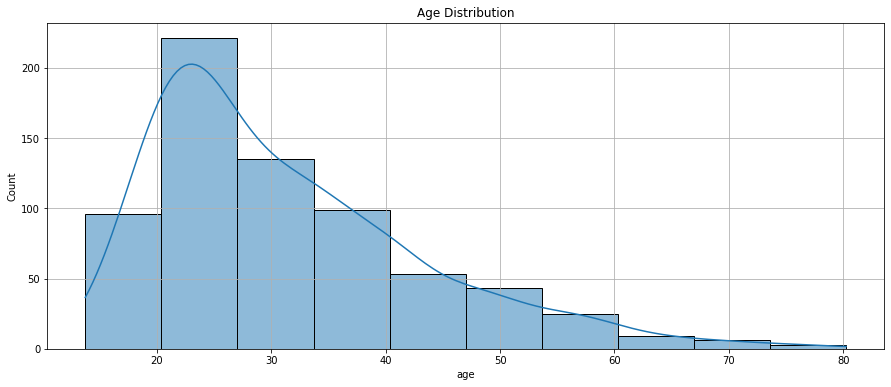

In [37]:
# Making a histogram of the contact_number variable.
f, ax = plt.subplots(figsize = (15,6))
ax = sns.histplot(x=df['age'], kde=True, bins=10)
ax.set_title('Age Distribution')
plt.grid(True)

Text(0.5, 1.0, 'years_employed Distribution')

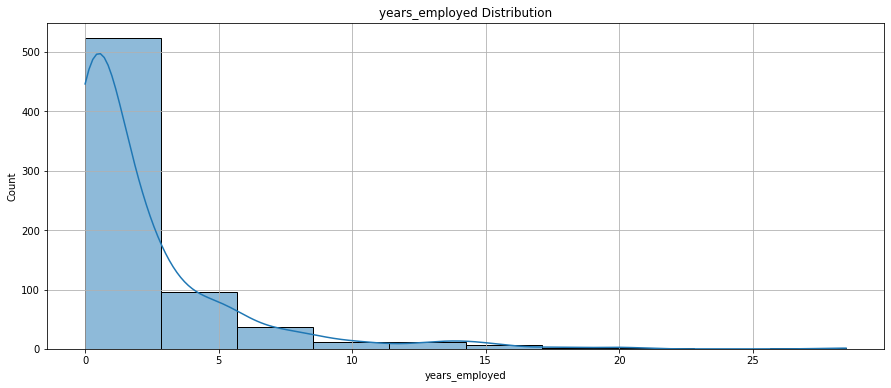

In [38]:
# Making a histogram of the contact_number variable.
f, ax = plt.subplots(figsize = (15,6))
ax = sns.histplot(x=df['years_employed'], kde=True, bins=10)
ax.set_title('years_employed Distribution')
plt.grid(True)

Text(0.5, 1.0, 'Debt Distribution')

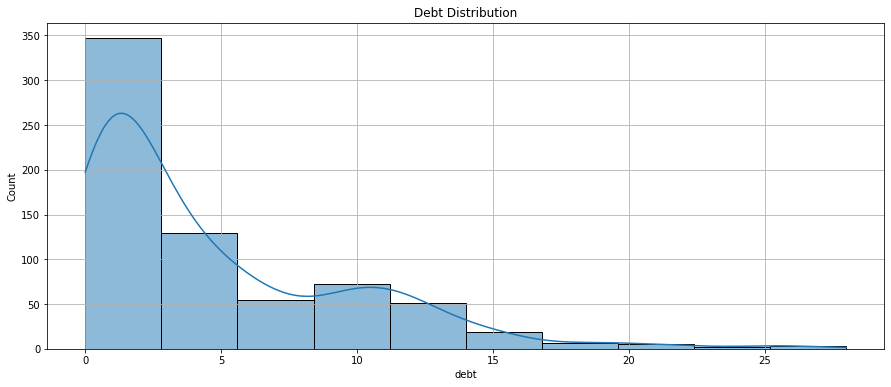

In [39]:
# Making a histogram of the contact_number variable.
f, ax = plt.subplots(figsize = (15,6))
ax = sns.histplot(x=df['debt'], kde=True, bins=10)
ax.set_title('Debt Distribution')
plt.grid(True)

## 11. Preprocessing the data (part 1)

<p>The missing values are now successfully handled.</p>
<p>There is still some minor but essential data preprocessing needed before we proceed towards building our machine learning model. We are going to divide these remaining preprocessing steps into three main tasks:</p>
<ol>
<li>Convert the non-numeric data into numeric.</li>
<li>Split the data into train and test sets. </li>
<li>Scale the feature values to a uniform range.</li>
</ol>
<p>First, we will be converting all the non-numeric values into numeric ones. We do this because not only it results in a faster computation but also many machine learning models (like XGBoost) (and especially the ones developed using scikit-learn) require the data to be in a strictly numeric format. We will do this by using a technique called <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html">label encoding</a>.</p>


In [40]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [41]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in df:
    # Compare if the dtype is object
    if df[col].dtypes =='object':
    # Use LabelEncoder to do the numeric transformation
        df[col]=le.fit_transform(df[col])

df.head()        

,gender,age,debt,married,bankcustomer,education_level,Ethnicity,years_employed,prior_default,employed,CreditScore,drivers_license,citizen,zipcode,income,approved
0,1,30.83,0.000,2,1,13,8,1.25,1,1,1,0,0,202,0,1
1,0,58.67,4.460,2,1,11,4,3.04,1,1,6,0,0,43,560,1
2,0,24.50,0.500,2,1,11,4,1.50,1,0,0,0,0,280,824,1
3,1,27.83,1.540,2,1,13,8,3.75,1,1,5,1,0,100,3,1
4,1,20.17,5.625,2,1,13,8,1.71,1,0,0,0,2,120,0,1


## 12. Splitting the dataset into train and test sets

<p>We have successfully converted all the non-numeric values to numeric ones.</p>
<p>Now, we will split our data into train set and test set to prepare our data for two different phases of machine learning modeling: training and testing. Ideally, no information from the test data should be used to scale the training data or should be used to direct the training process of a machine learning model. Hence, we first split the data and then apply the scaling.</p>
<p>Also, features like <code>DriversLicense</code> and <code>ZipCode</code> are not as important as the other features in the dataset for predicting credit card approvals. We should drop them to design our machine learning model with the best set of features. In Data Science literature, this is often referred to as <em>feature selection</em>. </p>

In [42]:
#let's explore all df features:
df.columns.unique()

Index(['gender', 'age', 'debt', 'married', 'bankcustomer', 'education_level',
       'Ethnicity', 'years_employed', 'prior_default', 'employed',
       'CreditScore', 'drivers_license', 'citizen', 'zipcode', 'income',
       'approved'],
      dtype='object')

In [43]:
# let's define our features, target variable, X and y:
features = ['gender', 'age', 'debt', 'married', 'bankcustomer', 
            'education_level','Ethnicity', 'years_employed', 
            'prior_default', 'employed','CreditScore', 'citizen', 
            'income']

X = df[features]
y = df.approved

In [44]:
df.approved.value_counts()

0    383
1    307
Name: approved, dtype: int64

<AxesSubplot:>

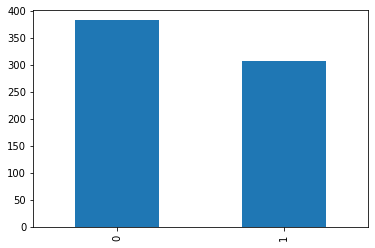

In [45]:
#Visualize dependent variable:
df.approved.value_counts().plot.bar()

In [46]:
# Split into train and test sets:

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=8107)

## 13. Preprocessing the data (part 2)

<p>The data is now split into two separate sets - train and test sets respectively. We are only left with one final preprocessing step of scaling before we can fit a machine learning model to the data. </p>
<p>Now, let's try to understand what these scaled values mean in the real world. Let's use <code>CreditScore</code> as an example. The credit score of a person is their creditworthiness based on their credit history. The higher this number, the more financially trustworthy a person is considered to be. So, a <code>CreditScore</code> of 1 is the highest since we're rescaling all the values to the range of 0-1.</p>


In [47]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

<AxesSubplot:>

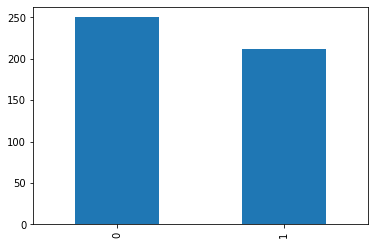

In [75]:
pd.Series(y_train).value_counts().plot.bar()

## 14. Modelling


Essentially, predicting if a credit card application will be approved or not is a binary-classification task. According to UCI, our dataset contains more instances that correspond to "Denied" status than instances corresponding to "Approved" status. Specifically, out of 690 instances, there are 383 (55.5%) applications that got denied and 307 (44.5%) applications that got approved.

This gives us a benchmark. A good machine learning model should be able to accurately predict the status of the applications with respect to these statistics.

Which model should we pick? A question to ask is: are the features that affect the credit card approval decision process correlated with each other? Although we can measure correlation, that is outside the scope of this notebook, so we'll rely on our intuition that they indeed are correlated for now. 

 * Logistic Regression model.
 * Decision Tree - Entropy - max_depth=5.
 * Decision Tree - Gini - max_depth=5.
 * Random Forest - max_depth=5.
 * Gradient Boosting - max_depth=5.
 * Extreme Gradient Boosting - max_depth=5.
 




### 14.1 Logistic Regression Model.

#### 14.1.1 Fitting a logistic regression model to the train set

In [48]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression(random_state=8107)

# Fit logreg to the train set
logreg.fit(rescaledX_train, y_train)

LogisticRegression(random_state=8107)

### 14.1.2 Making predictions and evaluating performance

<p>But how well does our model perform? </p>
<p>We will now evaluate our model on the test set with respect to <a href="https://developers.google.com/machine-learning/crash-course/classification/accuracy">classification accuracy</a>. But we will also take a look the model's <a href="http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/">confusion matrix</a>. In the case of predicting credit card applications, it is equally important to see if our machine learning model is able to predict the approval status of the applications as denied that originally got denied. If our model is not performing well in this aspect, then it might end up approving the application that should have been approved. The confusion matrix helps us to view our model's performance from these aspects.  </p>

Logistic Regression Model
Accuracy: 87.28070 %


Logistic Regression Model: classification report
              precision    recall  f1-score   support

           0   0.906250  0.872180  0.888889       133
           1   0.830000  0.873684  0.851282        95

    accuracy                       0.872807       228
   macro avg   0.868125  0.872932  0.870085       228
weighted avg   0.874479  0.872807  0.873219       228



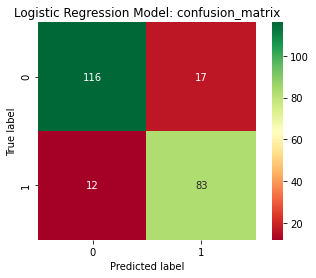

In [49]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree
from dtreeviz import trees
from sklearn.metrics import roc_curve

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Run this block for model evaluation metrics 
print("Logistic Regression Model")
print("Accuracy: {:0.5f}".format(metrics.accuracy_score(y_test,y_pred) *100), "%")
print('\n')
print("Logistic Regression Model: classification report")
print(classification_report(y_test, y_pred, digits=6))

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='RdYlGn')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Logistic Regression Model: confusion_matrix');

### 14.1.3 ROC AUC

Logistic Regression - AUC: 90.92996 %


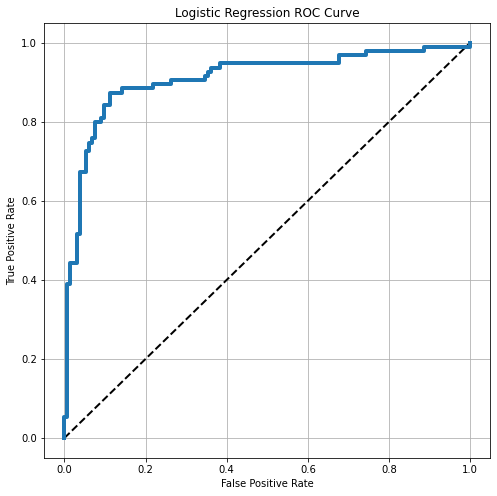

In [50]:
# Compute predicted probabilities: y_pred_prob:
y_pred_prob = logreg.predict_proba(rescaledX_test)[:,1]

print("Logistic Regression - AUC: {:0.5f}".format(roc_auc_score(y_test, y_pred_prob) * 100), "%")

# Generate ROC curve values: fpr, tpr, thresholds:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve:
plt.subplots(figsize = (8,8))
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.plot(fpr, tpr, label='Logistic Regression', linewidth=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.grid(True)
plt.show();

## 14.2 Decision Tree - Entropy - max_depth=5

### 14.2.1 Fitting a Decision Tree Entropy - max_depth=5 model to the train set

In [51]:

# Declare a variable called entr_model, and assign it: tree.DecisionTreeClassifier:
entr_model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state = 8107)

# Call fit() on entr_model:
entr_model.fit(rescaledX_train, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(rescaledX_test)



DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=8107)

### 14.2.2 Plotting a Decision Tree Entropy - max_depth=5

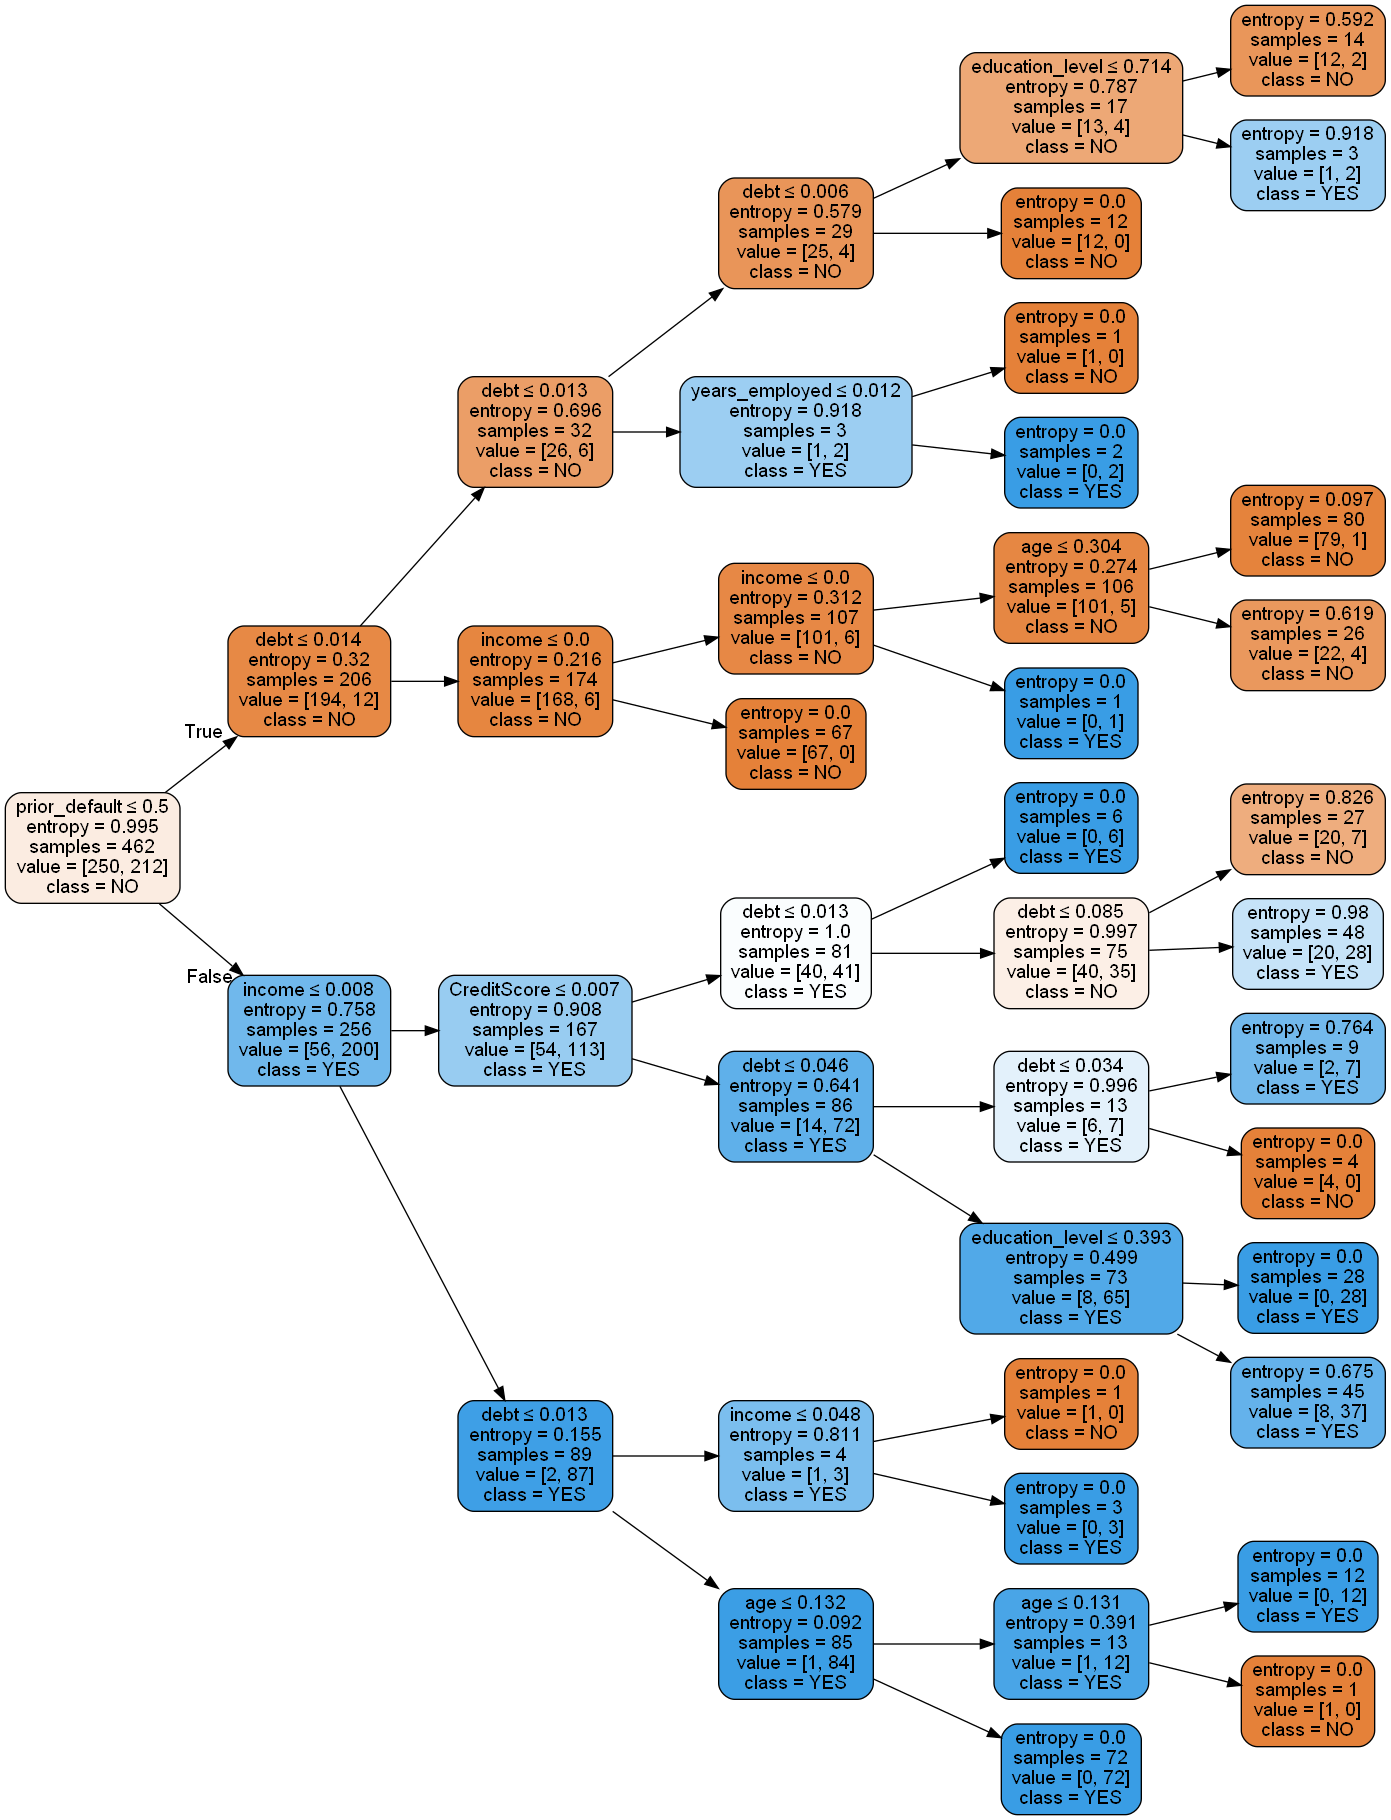

In [52]:

# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(entr_model, out_file=dot_data, 
                     filled=True, rounded=True, rotate =True,
                     special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"]) 

# Alternatively for class_names use entr_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### 14.2.3 Evaluating Performance:

Model Entropy - max_depth=5
Accuracy: 86.84211 %


Model Entropy - max_depth=5 - Balanced: classification report
              precision    recall  f1-score   support

           0   0.881481  0.894737  0.888060       133
           1   0.849462  0.831579  0.840426        95

    accuracy                       0.868421       228
   macro avg   0.865472  0.863158  0.864243       228
weighted avg   0.868140  0.868421  0.868212       228



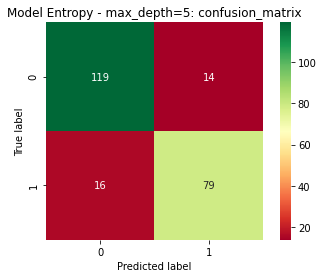

In [53]:
# Run this block for model evaluation metrics 
print("Model Entropy - max_depth=5")
print("Accuracy: {:0.5f}".format(metrics.accuracy_score(y_test,y_pred) *100), "%")
print('\n')
print("Model Entropy - max_depth=5 - Balanced: classification report")
print(classification_report(y_test, y_pred, digits=6))

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='RdYlGn')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Model Entropy - max_depth=5: confusion_matrix');

### 14.2.4 ROC AUC

Model Entropy - max_depth=5 - AUC: 88.96715 %


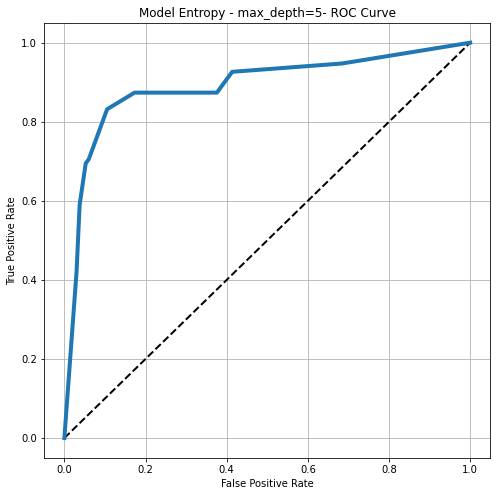

In [54]:
# Compute predicted probabilities: y_pred_prob:
y_pred_prob = entr_model.predict_proba(rescaledX_test)[:,1]

print("Model Entropy - max_depth=5 - AUC: {:0.5f}".format(roc_auc_score(y_test, y_pred_prob) * 100), "%")

# Generate ROC curve values: fpr, tpr, thresholds:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve:
plt.subplots(figsize = (8,8))
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.plot(fpr, tpr, label='Model Entropy - max_depth=5', linewidth=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model Entropy - max_depth=5- ROC Curve')
plt.grid(True)
plt.show();

## 14.3 Decision Tree - Gini - max_depth=5

### 14.3.1 Fitting a Decision Tree Gini - max_depth=5 model to the train set

In [55]:
# As before, make a variable, but call it gini_model2, and ensure the max_depth parameter is set to 3
gini_model = tree.DecisionTreeClassifier(criterion='gini', random_state = 8107, max_depth = 5)

# Do the fit, predict, and series transformations as before. 
gini_model.fit(rescaledX_train, y_train)
y_pred = gini_model.predict(rescaledX_test)



DecisionTreeClassifier(max_depth=5, random_state=8107)

### 14.3.2 Plotting a Decision Tree Gini - max_depth=5 model

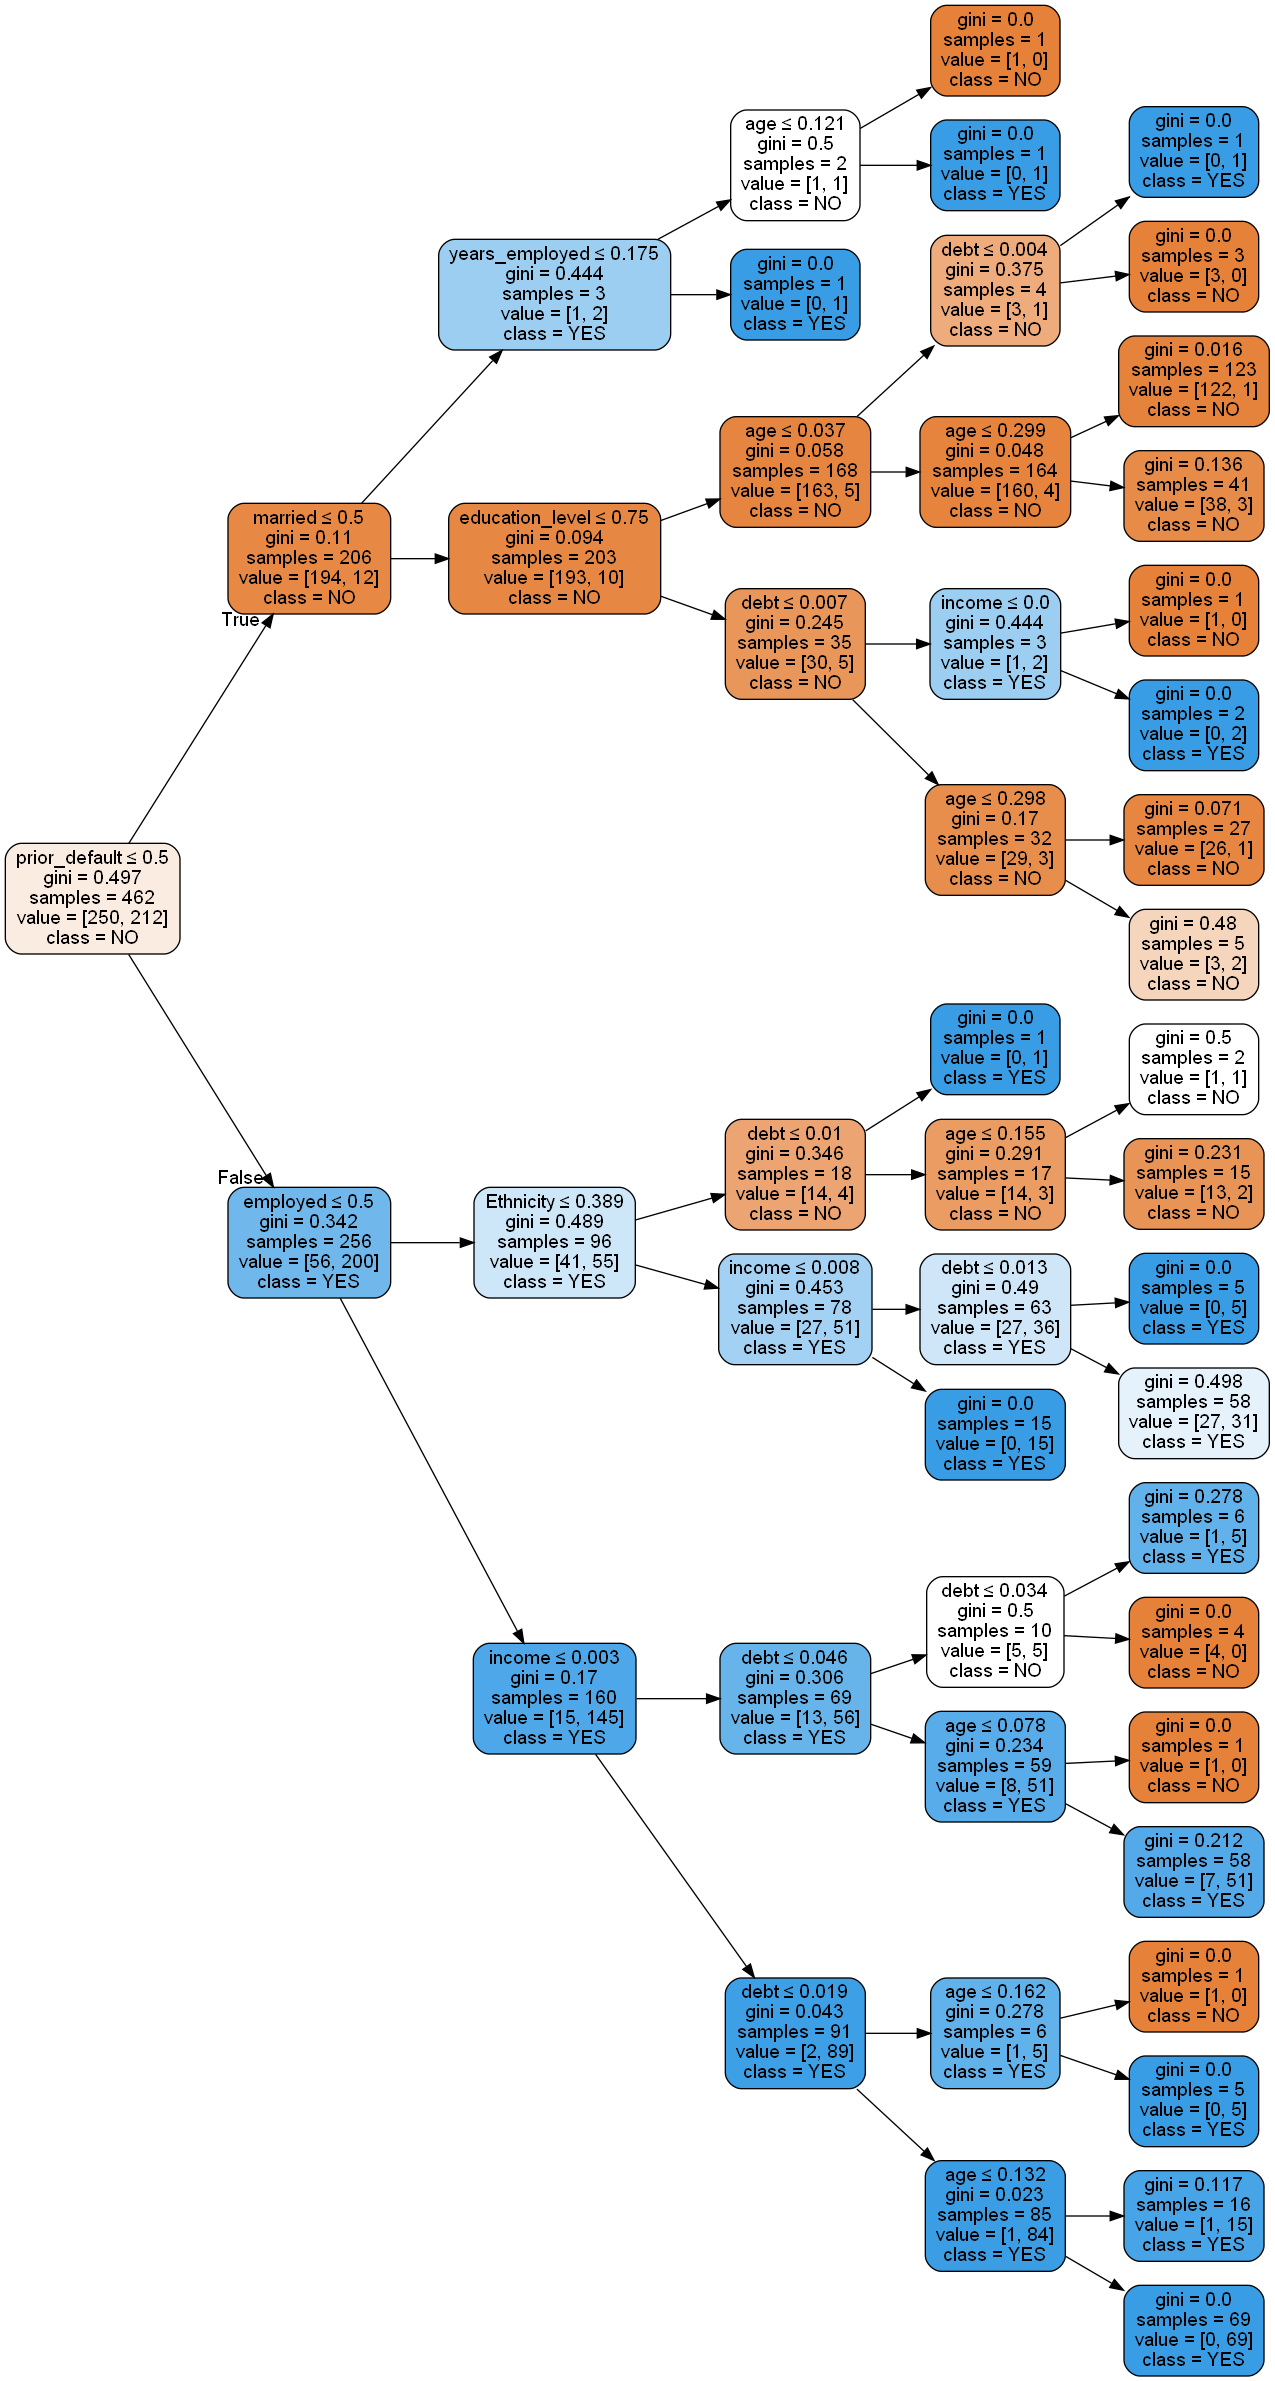

In [56]:
# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(gini_model, out_file=dot_data, 
                     filled=True, rounded=True, rotate =True,
                     special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"]) 

# Alternatively for class_names use entr_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### 14.3.3 Evaluating Performance:

Model Gini - max_depth=5
Accuracy: 86.40351 %


Model Gini - max_depth=5: classification report
              precision    recall  f1-score   support

           0   0.918033  0.842105  0.878431       133
           1   0.801887  0.894737  0.845771        95

    accuracy                       0.864035       228
   macro avg   0.859960  0.868421  0.862101       228
weighted avg   0.869639  0.864035  0.864823       228



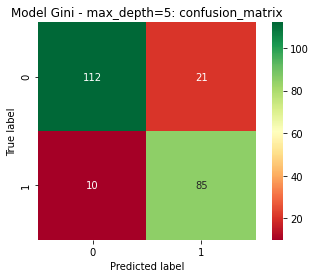

In [57]:
# Run this block for model evaluation metrics 
print("Model Gini - max_depth=5")
print("Accuracy: {:0.5f}".format(metrics.accuracy_score(y_test,y_pred) *100), "%")
print('\n')
print("Model Gini - max_depth=5: classification report")
print(classification_report(y_test, y_pred, digits=6))

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='RdYlGn')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Model Gini - max_depth=5: confusion_matrix');

### 14.3.4 ROC AUC

Decision Tree - Gini - max_depth=5 - AUC: 91.89553 %


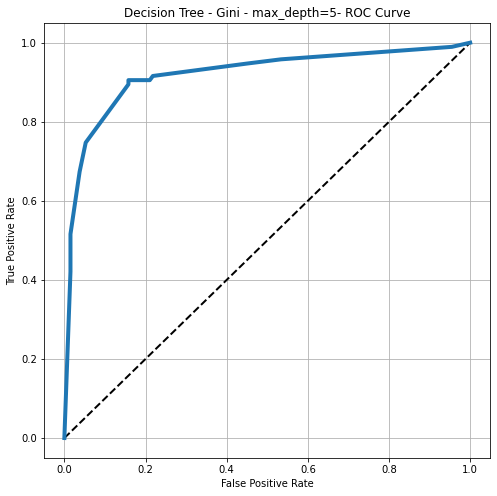

In [58]:
# Compute predicted probabilities: y_pred_prob:
y_pred_prob = gini_model.predict_proba(rescaledX_test)[:,1]

print("Decision Tree - Gini - max_depth=5 - AUC: {:0.5f}".format(roc_auc_score(y_test, y_pred_prob) * 100), "%")

# Generate ROC curve values: fpr, tpr, thresholds:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve:
plt.subplots(figsize = (8,8))
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.plot(fpr, tpr, label='Decision Tree - Gini - max_depth=5', linewidth=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree - Gini - max_depth=5- ROC Curve')
plt.grid(True)
plt.show();

## 14.4 Random Forests :max_depth=5

### 14.4.1 Fitting a Random Forests :max_depth=5 model to the train set

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Plug in appropriate max_depth and random_state parameters 
RF_Model = RandomForestClassifier(max_depth=5,random_state= 8107)

# Model and fit
RF_Model.fit(rescaledX_train, y_train)
y_pred = RF_Model.predict(rescaledX_test)




RandomForestClassifier(max_depth=5, random_state=8107)

### 14.4.2 Visualize one Decision Tree from our Random Forests Model

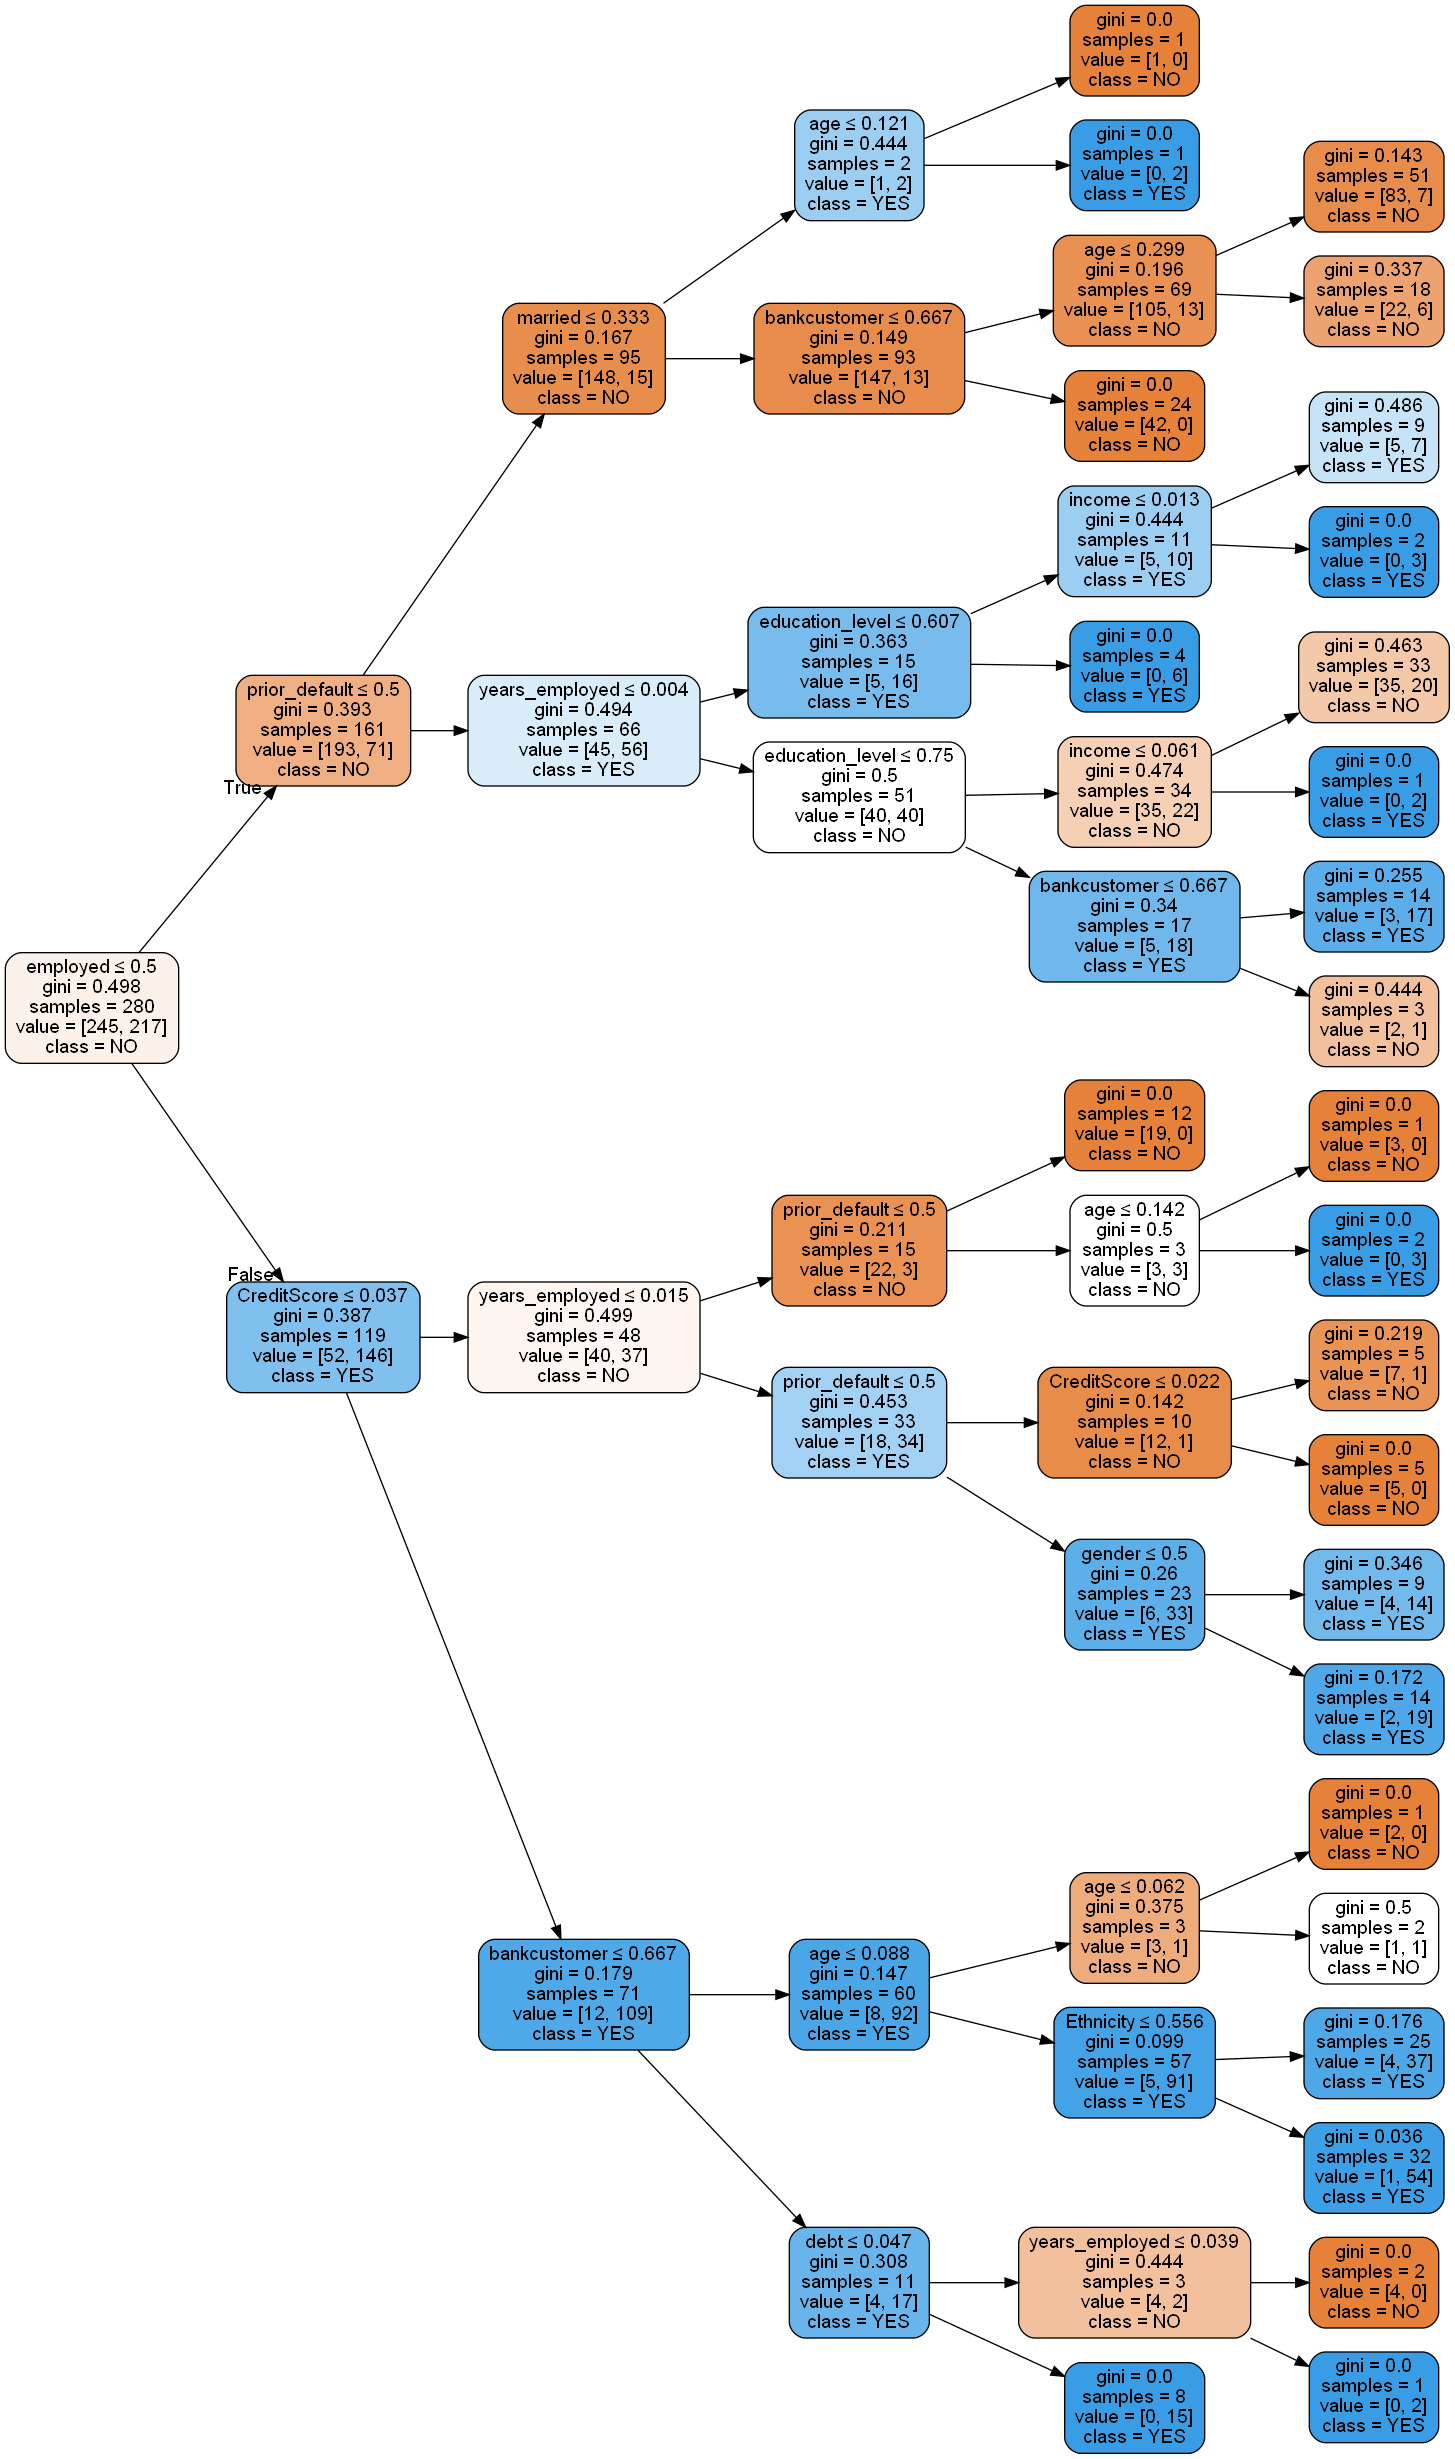

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from subprocess import call
from io import StringIO 
import pydotplus
from IPython.display import Image  

# Extract single tree
estimator = RF_Model.estimators_[1]

# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
export_graphviz(estimator, out_file=dot_data, 
                     filled=True, rounded=True, rotate =True,
                     special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"])

# Alternatively for class_names use entr_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### 14.4.3 Evaluating Performance

Random Forests Model - max depth 5
Accuracy: 89.47368 %


Random Forests Model - max depth 5: classification report
              precision    recall  f1-score   support

           0   0.892086  0.932331  0.911765       133
           1   0.898876  0.842105  0.869565        95

    accuracy                       0.894737       228
   macro avg   0.895481  0.887218  0.890665       228
weighted avg   0.894916  0.894737  0.894182       228



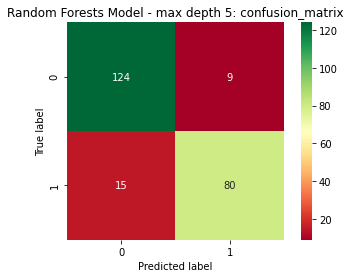

In [61]:
# Run this block for model evaluation metrics 
print("Random Forests Model - max depth 5")
print("Accuracy: {:0.5f}".format(metrics.accuracy_score(y_test,y_pred) *100), "%")
print('\n')
print("Random Forests Model - max depth 5: classification report")
print(classification_report(y_test, y_pred, digits=6))


mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='RdYlGn')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Random Forests Model - max depth 5: confusion_matrix');

### 14.4.4 ROC AUC

Random Forests Model - max depth 5:
AUC: 94.09577 %


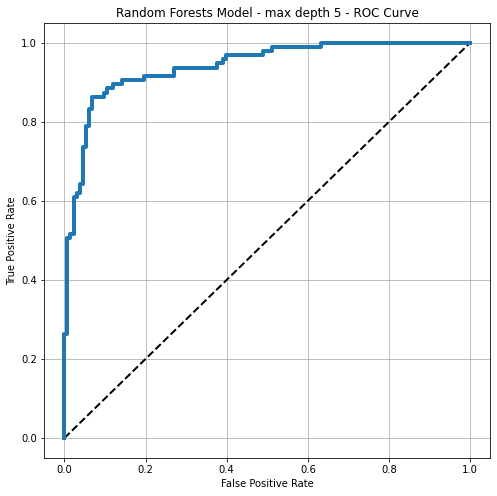

In [62]:
# Compute predicted probabilities: y_pred_prob:
y_pred_prob = RF_Model.predict_proba(rescaledX_test)[:,1]

print("Random Forests Model - max depth 5:")
print("AUC: {:0.5f}".format(roc_auc_score(y_test, y_pred_prob) * 100), "%")

# Generate ROC curve values: fpr, tpr, thresholds:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve:
plt.subplots(figsize = (8,8))
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.plot(fpr, tpr, label='Random Forests Model - max depth 5', linewidth=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forests Model - max depth 5 - ROC Curve')
plt.grid(True)
plt.show();

## 14.5 Gradient Boosting Model

### 14.5.1 Fitting a Gradient Boosting Model to the train set

In [63]:
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(learning_rate = learning_rate, max_depth = 5, random_state = 8107)
    gb.fit(rescaledX_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(rescaledX_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(rescaledX_test, y_test)))
    print()

GradientBoostingClassifier(learning_rate=0.05, max_depth=5, random_state=8107)

Learning rate:  0.05
Accuracy score (training): 0.991
Accuracy score (validation): 0.851



GradientBoostingClassifier(max_depth=5, random_state=8107)

Learning rate:  0.1
Accuracy score (training): 1.000
Accuracy score (validation): 0.873



GradientBoostingClassifier(learning_rate=0.25, max_depth=5, random_state=8107)

Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 0.868



GradientBoostingClassifier(learning_rate=0.5, max_depth=5, random_state=8107)

Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.882



GradientBoostingClassifier(learning_rate=0.75, max_depth=5, random_state=8107)

Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.855



GradientBoostingClassifier(learning_rate=1, max_depth=5, random_state=8107)

Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.868



### 14.5.2 Evaluating Performance

Gradient Boosting Model
Accuracy: 88.15789 %


Gradient Boosting Model-Classification Report:
              precision    recall  f1-score   support

           0   0.901515  0.894737  0.898113       133
           1   0.854167  0.863158  0.858639        95

    accuracy                       0.881579       228
   macro avg   0.877841  0.878947  0.878376       228
weighted avg   0.881787  0.881579  0.881666       228



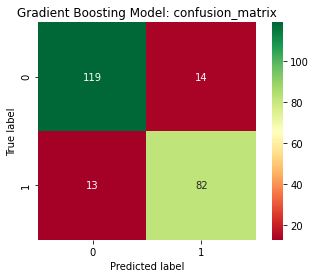

In [65]:

Learning_rate = 0.5

## Create the classifier:
gb_tuned = GradientBoostingClassifier(learning_rate = Learning_rate, max_depth = 5, random_state = 8107)

# Fit the classifier to the training data
gb_tuned.fit(rescaledX_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = gb_tuned.predict(rescaledX_test)

# Run this block for model evaluation metrics 
print("Gradient Boosting Model")
print("Accuracy: {:0.5f}".format(metrics.accuracy_score(y_test,y_pred) *100), "%")
print('\n')
print("Gradient Boosting Model-Classification Report:")
print(classification_report(y_test, y_pred, digits=6))


mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='RdYlGn')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Gradient Boosting Model: confusion_matrix');

### 14.5.3 ROC AUC

Gradient Boosting Model - max depth 5:
AUC: 94.03245 %


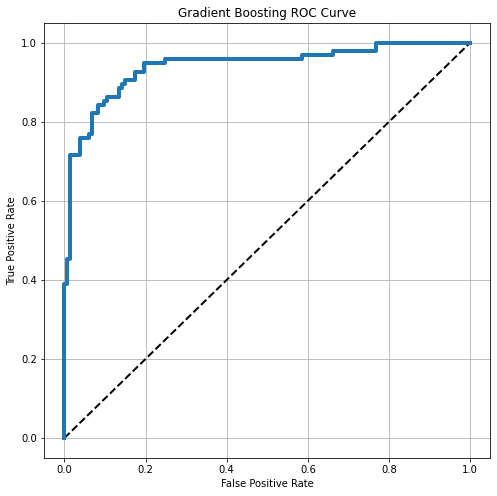

In [66]:

# Compute predicted probabilities: y_pred_prob:
y_pred_prob = gb_tuned.predict_proba(rescaledX_test)[:,1]

print("Gradient Boosting Model - max depth 5:")
print("AUC: {:0.5f}".format(roc_auc_score(y_test, y_pred_prob) * 100), "%")

# Generate ROC curve values: fpr, tpr, thresholds:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve:
plt.subplots(figsize = (8,8))
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.plot(fpr, tpr, label='Gradient Boost', linewidth=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve')
plt.grid(True)
plt.show();

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

## 14.6 Extreme Gradient Boosting Model

### 14.6.1 Fitting a Extreme Gradient Boosting Model to the train set

In [67]:
import xgboost as xgb

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', max_depth=5 ,seed=8107)

# Fit the classifier to the training set
xg_cl.fit(rescaledX_train, y_train)

# Predict the labels of the test set: preds
y_pred = xg_cl.predict(rescaledX_test)



[14:18:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aktha\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              random_state=8107, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=8107, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

### 14.6.2 Evaluating Performance

Extreme Gradient Boosting Model
Accuracy: 85.96491 %


Extreme Gradient Boosting Model: classification report
              precision    recall  f1-score   support

           0   0.874074  0.887218  0.880597       133
           1   0.838710  0.821053  0.829787        95

    accuracy                       0.859649       228
   macro avg   0.856392  0.854135  0.855192       228
weighted avg   0.859339  0.859649  0.859426       228



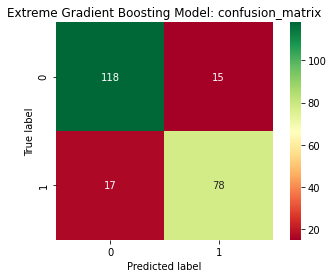

In [68]:
# Run this block for model evaluation metrics 
print("Extreme Gradient Boosting Model")
print("Accuracy: {:0.5f}".format(metrics.accuracy_score(y_test,y_pred) *100), "%")
print('\n')
print("Extreme Gradient Boosting Model: classification report")
print(classification_report(y_test, y_pred, digits=6))

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='RdYlGn')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Extreme Gradient Boosting Model: confusion_matrix');

### 14.6.3 ROC AUC

Extreme Gradient Boosting Model - max depth 5:
AUC: 93.56549 %


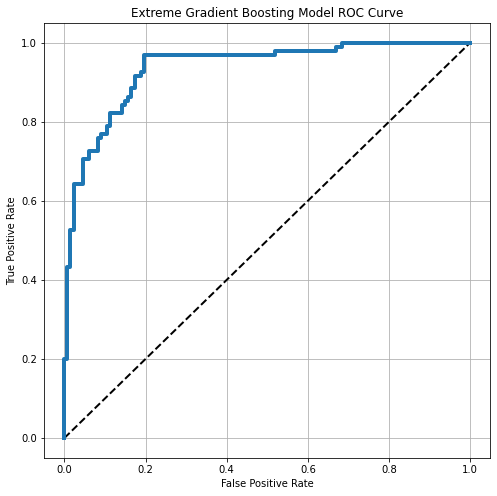

In [69]:
# Compute predicted probabilities: y_pred_prob:
y_pred_prob = xg_cl.predict_proba(rescaledX_test)[:,1]

print("Extreme Gradient Boosting Model - max depth 5:")
print("AUC: {:0.5f}".format(roc_auc_score(y_test, y_pred_prob) * 100), "%")

# Generate ROC curve values: fpr, tpr, thresholds:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve:
plt.subplots(figsize = (8,8))
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.plot(fpr, tpr, label='Extreme Gradient Boost', linewidth=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extreme Gradient Boosting Model ROC Curve')
plt.grid(True)
plt.show();

# 15 Model Comparison and the Winner !!!


The Random Forests Model shows an overall **Accuracy 89.47% and AUC 94%**, which is great and indicates that our model outperforms all other Models and was effectively able to predict if an individual's application for a credit card will be accepted or rejected

| <code>Model</code>|<code>Accuracy</code>|<code>AUC</code>|
|:------------------|:------------------:|:------------------:|
|Logistic Regression model|87.28070 %    |90.92996 %    |
|Decision Tree - Entropy - max_depth=5|86.84211 %    |88.96715 %    |
|Decision Tree - Gini - max_depth=5|86.40351 %    |91.89553 %    |
|<code>Random Forest - max_depth=5</code>|<code>89.47368 %   </code> | <code>94.09577 %  </code> |
|Gradient Boosting - max_depth=5|88.15789 %      | 94.03245 %   |
|Extreme Gradient Boosting| 85.96491 %    | 93.56549 %   |



| <code>Model</code>|<code>Class 0 precision</code>|<code>Class 1 precision</code>|<code>Class 0 recall</code>|<code>Class 1 recall</code>|
|:------------------|:------------------:|:------------------:|:------------------:|:------------------:|
|Logistic Regression model|0.906250      |0.830000      | 0.872180  |0.873684  |
|Decision Tree - Entropy - max_depth=5| 0.881481       | 0.849462       | 0.894737     |0.831579       |
|Decision Tree - Gini - max_depth=5|  0.918033      | 0.801887       |  0.842105    |  0.894737     |
|<code>Random Forest - max_depth=5</code>| 0.892086       | 0.898876       | 0.932331     | 0.842105      |
|Gradient Boosting - max_depth=5| 0.901515       | 0.854167       | 0.894737     | 0.863158      |
|Extreme Gradient Boosting| 0.874074       | 0.838710       | 0.887218   |0.821053  |

In [2]:
#Let's run below to increase the width of the Jupyter cell to 100% for better visibility:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
#Let's run below to allow for multiple print from one jupyter cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"